# Deep Learning - ANN

In [ ]:
pip install tensorflow

In [2]:
import pandas as pd

In [3]:
# prompt: google drive mount

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path='/content/drive/MyDrive/unal_DL/pima-indians-diabetes.csv'

In [5]:
df=pd.read_csv(file_path)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [71]:
y=df['Outcome']
X=df.drop('Outcome', axis=1)

In [72]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [73]:
df.shape

(768, 9)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [78]:
model=Sequential()
model.add(Dense(120, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [79]:
#Farklı epoch ve batch size değerleri ile denenerek optimal değerler bulunur
history=model.fit(X,y,epochs=50,batch_size=32,validation_split=.20,verbose=1)
#epochs=veri seti eğitim için kaç kere kullanılacak batchsize=veriyi kaç parçada alsın
#verbose her epoch ta yazsın

Epoch 1/50
20/20 [==============================] - 1s 13ms/step - loss: 0.6069 - accuracy: 0.7150 - val_loss: 0.5470 - val_accuracy: 0.7597
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4926 - accuracy: 0.7801 - val_loss: 0.5000 - val_accuracy: 0.7468
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4657 - accuracy: 0.7671 - val_loss: 0.4880 - val_accuracy: 0.7468
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4507 - accuracy: 0.7866 - val_loss: 0.4797 - val_accuracy: 0.7662
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4447 - accuracy: 0.7915 - val_loss: 0.4785 - val_accuracy: 0.7532
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4335 - accuracy: 0.7980 - val_loss: 0.4830 - val_accuracy: 0.7662
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4271 - accuracy: 0.7964 - val_loss: 0.4790 - val_accuracy: 0.7727
Epoch 8/50
20/20 [=

In [80]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 120)               1080      
                                                                 
 dense_41 (Dense)            (None, 64)                7744      
                                                                 
 dense_42 (Dense)            (None, 6)                 390       
                                                                 
 dense_43 (Dense)            (None, 1)                 7         
                                                                 
Total params: 9221 (36.02 KB)
Trainable params: 9221 (36.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


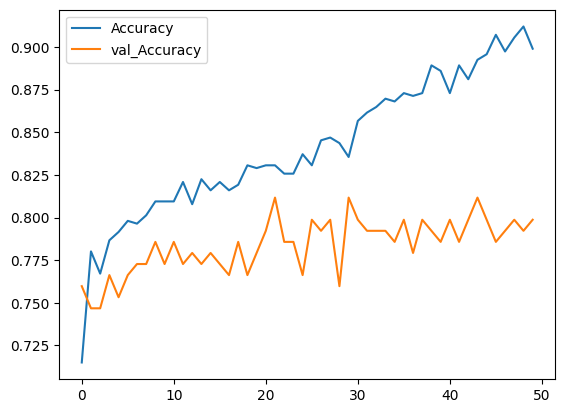

In [81]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='val_Accuracy')
plt.legend()

Örnek verilerle deneyin:
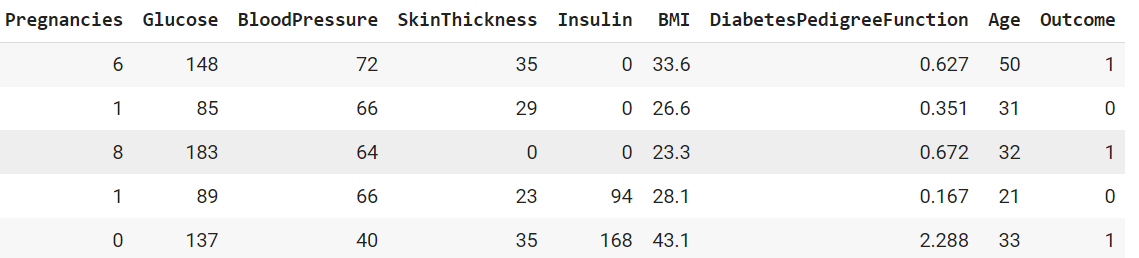

In [84]:
import numpy as np
def predict_diabetes(input_data):
  # Convert input data to a NumPy array
  input_data_as_numpy_array = np.asarray(input_data)

  # Reshape the array as we are predicting for one instance
  input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

  # Standardize the input data
  standardized_input_data = scaler.transform(input_data_reshaped)

  print ("Standartlaştırılmış değerler:", standardized_input_data)
  # Predict using the model
  prediction = model.predict(standardized_input_data)

  # Print the prediction
  print('Tahmin Olasılığı:',prediction[0])
  if prediction[0] > 0.5:
    print("Tahmin: Diabet-Pozitif")
  else:
    print("Tahmin: Diabet-Negatif")

# Get input from the user
input_data = []
columns=['hamilelik sayısı','glikoz değeri','kan basıncı', 'deri kalınlığı',
        'insulin', 'vücut kitle indeksi','diyabet soy fonksiyonu',
        'yaş']
for column in columns:
  value = float(input("Değerleri girin " + column + ": "))
  input_data.append(value)

# Make prediction
predict_diabetes(input_data)


Değerleri girin hamilelik sayısı: 8
Değerleri girin glikoz değeri: 183
Değerleri girin kan basıncı: 64
Değerleri girin deri kalınlığı: 0
Değerleri girin insulin: 0
Değerleri girin vücut kitle indeksi: 23.3
Değerleri girin diyabet soy fonksiyonu: 0.672
Değerleri girin yaş: 32
Standartlaştırılmış değerler: [[ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]]
1/1 [==============================] - 0s 21ms/step
Tahmin Olasılığı: [0.9014424]
Tahmin: Diabet-Pozitif


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [85]:
#2. Tahmin
input_data = []
columns=['hamilelik sayısı','glikoz değeri','kan basıncı', 'deri kalınlığı',
        'insulin', 'vücut kitle indeksi','diyabet soy fonksiyonu',
        'yaş']
for column in columns:
  value = float(input("Değerleri girin " + column + ": "))
  input_data.append(value)

# Make prediction
predict_diabetes(input_data)

Değerleri girin hamilelik sayısı: 1
Değerleri girin glikoz değeri: 89
Değerleri girin kan basıncı: 66
Değerleri girin deri kalınlığı: 23
Değerleri girin insulin: 94
Değerleri girin vücut kitle indeksi: 28.1
Değerleri girin diyabet soy fonksiyonu: 0.167
Değerleri girin yaş: 21
Standartlaştırılmış değerler: [[-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]]
1/1 [==============================] - 0s 21ms/step
Tahmin Olasılığı: [0.00333751]
Tahmin: Diabet-Negatif


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
